# Task 2

---

## Predictive modeling of customer bookings

This Jupyter notebook includes some code to get you started with this predictive modeling task. We will use various packages for data manipulation, feature engineering and machine learning.

### Exploratory data analysis

First, we must explore the data in order to better understand what we have and the statistical properties of the dataset.

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("customer_booking.csv", encoding="ISO-8859-1")
df.head()

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
0,2,Internet,RoundTrip,262,19,7,Sat,AKLDEL,New Zealand,1,0,0,5.52,0
1,1,Internet,RoundTrip,112,20,3,Sat,AKLDEL,New Zealand,0,0,0,5.52,0
2,2,Internet,RoundTrip,243,22,17,Wed,AKLDEL,India,1,1,0,5.52,0
3,1,Internet,RoundTrip,96,31,4,Sat,AKLDEL,New Zealand,0,0,1,5.52,0
4,2,Internet,RoundTrip,68,22,15,Wed,AKLDEL,India,1,0,1,5.52,0


The `.head()` method allows us to view the first 5 rows in the dataset, this is useful for visual inspection of our columns

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   num_passengers         50000 non-null  int64  
 1   sales_channel          50000 non-null  object 
 2   trip_type              50000 non-null  object 
 3   purchase_lead          50000 non-null  int64  
 4   length_of_stay         50000 non-null  int64  
 5   flight_hour            50000 non-null  int64  
 6   flight_day             50000 non-null  object 
 7   route                  50000 non-null  object 
 8   booking_origin         50000 non-null  object 
 9   wants_extra_baggage    50000 non-null  int64  
 10  wants_preferred_seat   50000 non-null  int64  
 11  wants_in_flight_meals  50000 non-null  int64  
 12  flight_duration        50000 non-null  float64
 13  booking_complete       50000 non-null  int64  
dtypes: float64(1), int64(8), object(5)
memory usage: 5.3+ 

The `.info()` method gives us a data description, telling us the names of the columns, their data types and how many null values we have. Fortunately, we have no null values. It looks like some of these columns should be converted into different data types, e.g. flight_day.

To provide more context, below is a more detailed data description, explaining exactly what each column means:

- `num_passengers` = number of passengers travelling
- `sales_channel` = sales channel booking was made on
- `trip_type` = trip Type (Round Trip, One Way, Circle Trip)
- `purchase_lead` = number of days between travel date and booking date
- `length_of_stay` = number of days spent at destination
- `flight_hour` = hour of flight departure
- `flight_day` = day of week of flight departure
- `route` = origin -> destination flight route
- `booking_origin` = country from where booking was made
- `wants_extra_baggage` = if the customer wanted extra baggage in the booking
- `wants_preferred_seat` = if the customer wanted a preferred seat in the booking
- `wants_in_flight_meals` = if the customer wanted in-flight meals in the booking
- `flight_duration` = total duration of flight (in hours)
- `booking_complete` = flag indicating if the customer completed the booking

Before we compute any statistics on the data, lets do any necessary data conversion

In [4]:
df["flight_day"].unique()

array(['Sat', 'Wed', 'Thu', 'Mon', 'Sun', 'Tue', 'Fri'], dtype=object)

In [5]:
mapping = {
    "Mon": 1,
    "Tue": 2,
    "Wed": 3,
    "Thu": 4,
    "Fri": 5,
    "Sat": 6,
    "Sun": 7,
}

df["flight_day"] = df["flight_day"].map(mapping)

In [6]:
df["flight_day"].unique()

array([6, 3, 4, 1, 7, 2, 5], dtype=int64)

In [7]:
df.describe()

,num_passengers,purchase_lead,length_of_stay,flight_hour,flight_day,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
count,50000.000000,50000.000000,50000.00000,50000.00000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,1.591240,84.940480,23.04456,9.06634,3.814420,0.668780,0.296960,0.427140,7.277561,0.149560
std,1.020165,90.451378,33.88767,5.41266,1.992792,0.470657,0.456923,0.494668,1.496863,0.356643
min,1.000000,0.000000,0.00000,0.00000,1.000000,0.000000,0.000000,0.000000,4.670000,0.000000
25%,1.000000,21.000000,5.00000,5.00000,2.000000,0.000000,0.000000,0.000000,5.620000,0.000000
50%,1.000000,51.000000,17.00000,9.00000,4.000000,1.000000,0.000000,0.000000,7.570000,0.000000
75%,2.000000,115.000000,28.00000,13.00000,5.000000,1.000000,1.000000,1.000000,8.830000,0.000000
max,9.000000,867.000000,778.00000,23.00000,7.000000,1.000000,1.000000,1.000000,9.500000,1.000000


The `.describe()` method gives us a summary of descriptive statistics over the entire dataset (only works for numeric columns). This gives us a quick overview of a few things such as the mean, min, max and overall distribution of each column.

From this point, you should continue exploring the dataset with some visualisations and other metrics that you think may be useful. Then, you should prepare your dataset for predictive modelling. Finally, you should train your machine learning model, evaluate it with performance metrics and output visualisations for the contributing variables. All of this analysis should be summarised in your single slide.

In [8]:
df.head()

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
0,2,Internet,RoundTrip,262,19,7,6,AKLDEL,New Zealand,1,0,0,5.52,0
1,1,Internet,RoundTrip,112,20,3,6,AKLDEL,New Zealand,0,0,0,5.52,0
2,2,Internet,RoundTrip,243,22,17,3,AKLDEL,India,1,1,0,5.52,0
3,1,Internet,RoundTrip,96,31,4,6,AKLDEL,New Zealand,0,0,1,5.52,0
4,2,Internet,RoundTrip,68,22,15,3,AKLDEL,India,1,0,1,5.52,0


In [9]:
df.corr()['booking_complete']

C:\Users\Rishabh\AppData\Local\Temp\ipykernel_19340\688738500.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()['booking_complete']


num_passengers           0.024116
purchase_lead           -0.022131
length_of_stay          -0.042408
flight_hour              0.007127
flight_day              -0.006986
wants_extra_baggage      0.068139
wants_preferred_seat     0.050116
wants_in_flight_meals    0.026511
flight_duration         -0.106266
booking_complete         1.000000
Name: booking_complete, dtype: float64

In [10]:
df.head(3)

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
0,2,Internet,RoundTrip,262,19,7,6,AKLDEL,New Zealand,1,0,0,5.52,0
1,1,Internet,RoundTrip,112,20,3,6,AKLDEL,New Zealand,0,0,0,5.52,0
2,2,Internet,RoundTrip,243,22,17,3,AKLDEL,India,1,1,0,5.52,0


In [11]:
df['sales_channel'].value_counts()

Internet    44382
Mobile       5618
Name: sales_channel, dtype: int64

In [12]:
df.isna().any()

num_passengers           False
sales_channel            False
trip_type                False
purchase_lead            False
length_of_stay           False
flight_hour              False
flight_day               False
route                    False
booking_origin           False
wants_extra_baggage      False
wants_preferred_seat     False
wants_in_flight_meals    False
flight_duration          False
booking_complete         False
dtype: bool

In [13]:
df['trip_type'].value_counts()

RoundTrip     49497
OneWay          387
CircleTrip      116
Name: trip_type, dtype: int64

In [14]:
df.shape

(50000, 14)

In [15]:
df['booking_origin'].value_counts()


Australia               17872
Malaysia                 7174
South Korea              4559
Japan                    3885
China                    3387
                        ...  
Panama                      1
Tonga                       1
Tanzania                    1
Bulgaria                    1
Svalbard & Jan Mayen        1
Name: booking_origin, Length: 104, dtype: int64

In [16]:
def booking_countries(text):
    if text=='Australia' or text=='Malaysia' or text=='South Korea' or text=='Japan' or text=='China':
        return text
    else:
        return "Other countries"

In [17]:
df['booking_origin'] = df['booking_origin'].apply(booking_countries)

In [18]:
df['booking_origin'].value_counts()

Australia          17872
Other countries    13123
Malaysia            7174
South Korea         4559
Japan               3885
China               3387
Name: booking_origin, dtype: int64

In [19]:
df.head()

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
0,2,Internet,RoundTrip,262,19,7,6,AKLDEL,Other countries,1,0,0,5.52,0
1,1,Internet,RoundTrip,112,20,3,6,AKLDEL,Other countries,0,0,0,5.52,0
2,2,Internet,RoundTrip,243,22,17,3,AKLDEL,Other countries,1,1,0,5.52,0
3,1,Internet,RoundTrip,96,31,4,6,AKLDEL,Other countries,0,0,1,5.52,0
4,2,Internet,RoundTrip,68,22,15,3,AKLDEL,Other countries,1,0,1,5.52,0


In [20]:
df['booking_complete'].value_counts()

0    42522
1     7478
Name: booking_complete, dtype: int64

In [21]:
df['flight_duration'].value_counts()

8.83    14520
8.58     6965
5.62     5524
6.62     4721
7.00     3374
7.57     2835
4.67     2743
6.42     1737
5.33     1554
4.75     1255
6.33     1190
8.67      807
5.52      667
5.07      512
4.72      502
8.15      311
5.00      241
7.42      224
4.83      156
5.13      125
9.50       37
Name: flight_duration, dtype: int64

In [22]:
df['route'].value_counts().values

array([2680,  924,  842,  801,  744,  695,  679,  666,  655,  649,  644,
        614,  532,  511,  474,  465,  442,  437,  417,  414,  409,  389,
        375,  369,  361,  351,  350,  346,  342,  338,  338,  335,  327,
        317,  314,  313,  312,  299,  298,  296,  288,  275,  273,  272,
        268,  265,  261,  261,  254,  254,  242,  235,  232,  230,  228,
        227,  221,  218,  214,  210,  210,  208,  197,  184,  184,  181,
        181,  180,  178,  177,  176,  175,  171,  163,  161,  161,  161,
        156,  155,  154,  152,  150,  149,  146,  145,  144,  144,  142,
        141,  140,  139,  137,  134,  132,  131,  126,  125,  125,  123,
        123,  120,  119,  118,  118,  118,  117,  116,  115,  113,  112,
        110,  108,  108,  107,  107,  106,  106,  106,  106,  103,  102,
        101,  100,   99,   98,   98,   98,   97,   97,   97,   94,   92,
         92,   91,   90,   89,   89,   88,   88,   87,   86,   86,   86,
         85,   85,   84,   84,   83,   83,   82,   

In [23]:
df_wo_route = df.drop(columns=['route'])

In [24]:
df_wo_route.head()

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
0,2,Internet,RoundTrip,262,19,7,6,Other countries,1,0,0,5.52,0
1,1,Internet,RoundTrip,112,20,3,6,Other countries,0,0,0,5.52,0
2,2,Internet,RoundTrip,243,22,17,3,Other countries,1,1,0,5.52,0
3,1,Internet,RoundTrip,96,31,4,6,Other countries,0,0,1,5.52,0
4,2,Internet,RoundTrip,68,22,15,3,Other countries,1,0,1,5.52,0


In [26]:
df['trip_type'].value_counts()

RoundTrip     49497
OneWay          387
CircleTrip      116
Name: trip_type, dtype: int64

In [30]:
df[df['trip_type']=='CircleTrip'].head()

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
20,2,Internet,CircleTrip,228,29,23,3,AKLHND,Other countries,1,0,0,7.57,0
78,1,Mobile,CircleTrip,281,18,3,3,AKLKTM,Other countries,1,0,0,4.75,0
79,1,Internet,CircleTrip,282,18,19,2,AKLKTM,Other countries,1,0,0,4.75,0
4604,1,Internet,CircleTrip,157,19,11,7,CMBKIX,Japan,1,1,1,7.00,0
4720,1,Internet,CircleTrip,48,18,9,7,CMBMEL,Australia,1,0,0,8.83,0


In [32]:
df['num_passengers'].value_counts()

1    31352
2    12804
3     2941
4     1784
5      561
6      289
7      114
8       89
9       66
Name: num_passengers, dtype: int64

In [35]:
import seaborn as sns
import matplotlib.pyplot as plt

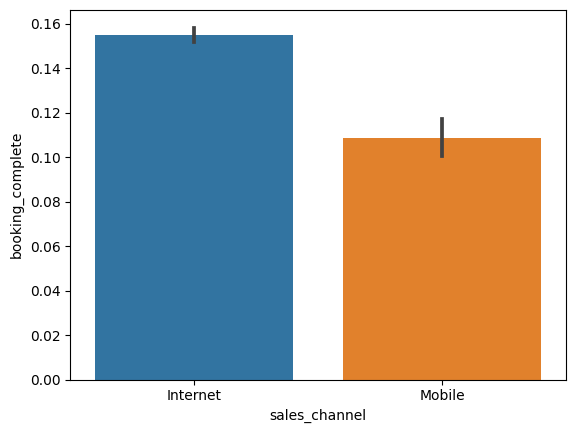

In [37]:


sns.barplot(x=df['sales_channel'], y=df['booking_complete'])
plt.show()

In [39]:
df = df_wo_route

In [40]:
df.head()

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
0,2,Internet,RoundTrip,262,19,7,6,Other countries,1,0,0,5.52,0
1,1,Internet,RoundTrip,112,20,3,6,Other countries,0,0,0,5.52,0
2,2,Internet,RoundTrip,243,22,17,3,Other countries,1,1,0,5.52,0
3,1,Internet,RoundTrip,96,31,4,6,Other countries,0,0,1,5.52,0
4,2,Internet,RoundTrip,68,22,15,3,Other countries,1,0,1,5.52,0


In [43]:
df.columns

Index(['num_passengers', 'sales_channel', 'trip_type', 'purchase_lead',
       'length_of_stay', 'flight_hour', 'flight_day', 'booking_origin',
       'wants_extra_baggage', 'wants_preferred_seat', 'wants_in_flight_meals',
       'flight_duration', 'booking_complete'],
      dtype='object')

<AxesSubplot: >

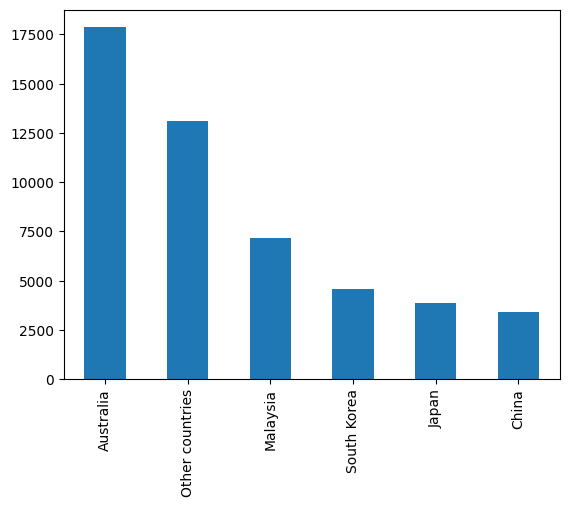

In [88]:
df['booking_origin'].value_counts().plot(kind='bar')

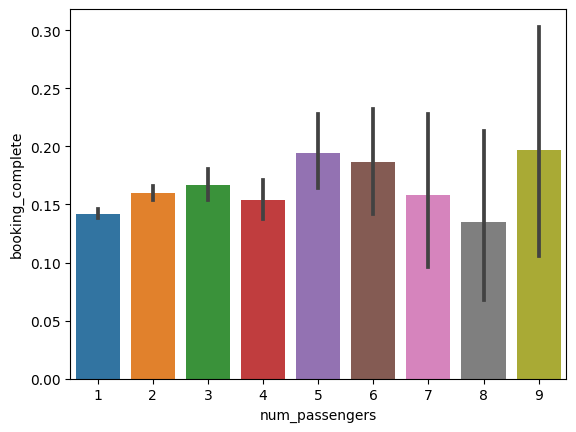

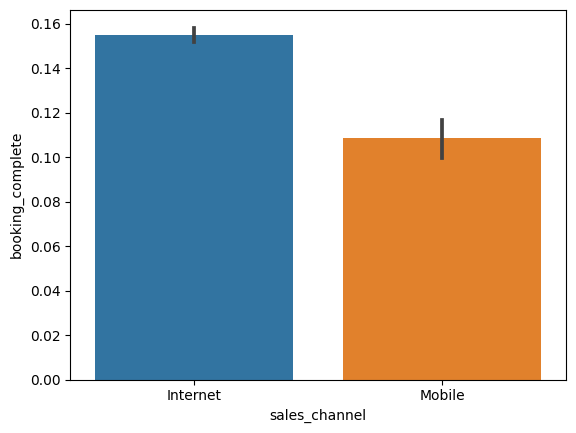

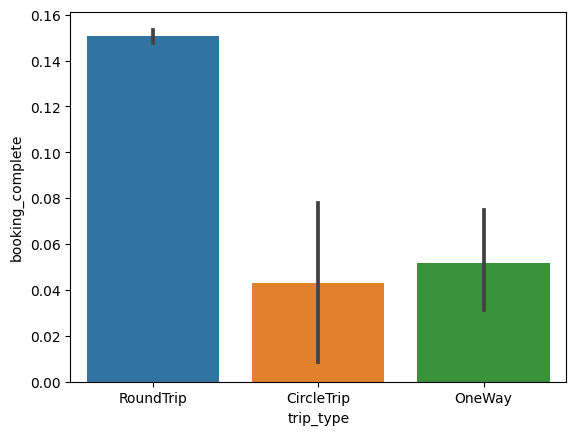

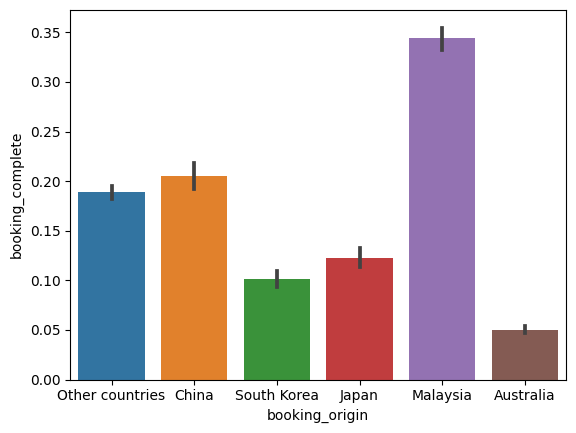

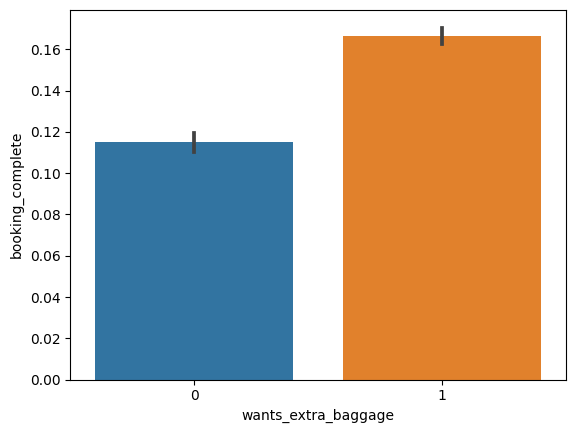

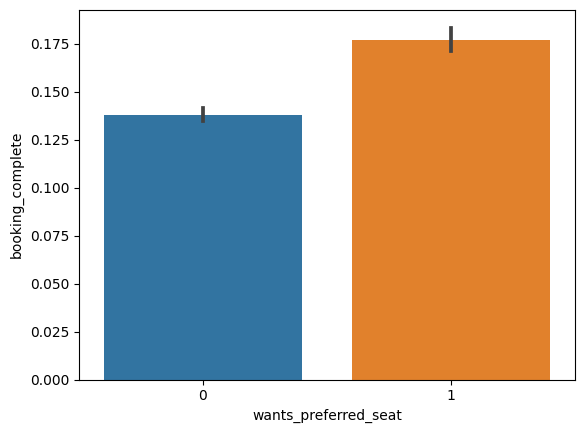

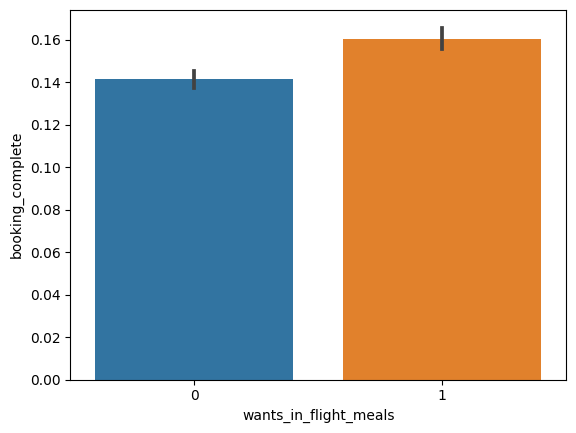

In [45]:
for i in ['num_passengers', 'sales_channel', 'trip_type', 'booking_origin', 'wants_extra_baggage', 'wants_preferred_seat', 'wants_in_flight_meals']:
    sns.barplot(x=df[i], y=df['booking_complete'])
    plt.show()

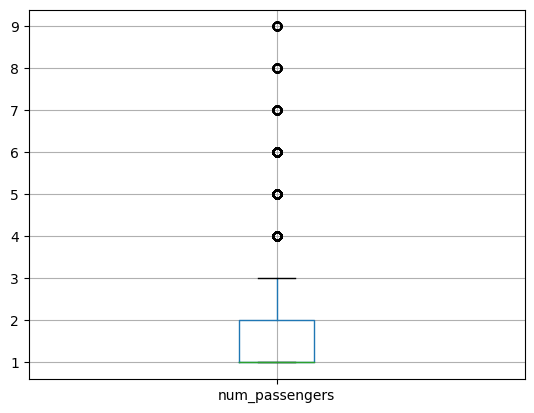

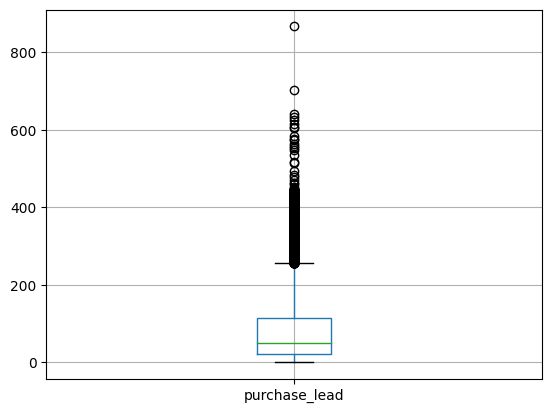

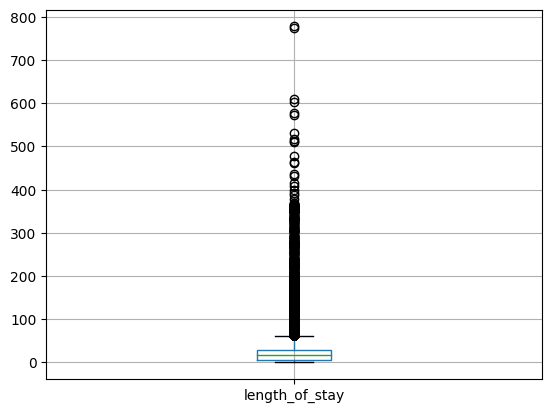

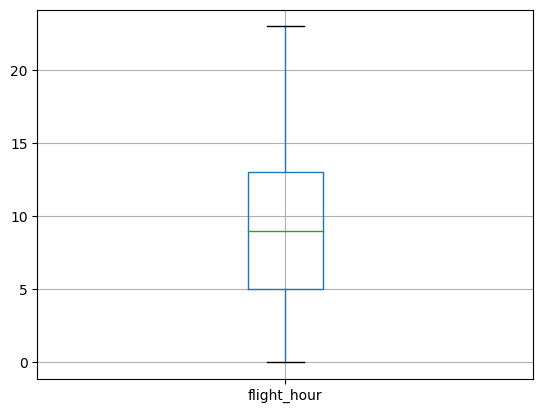

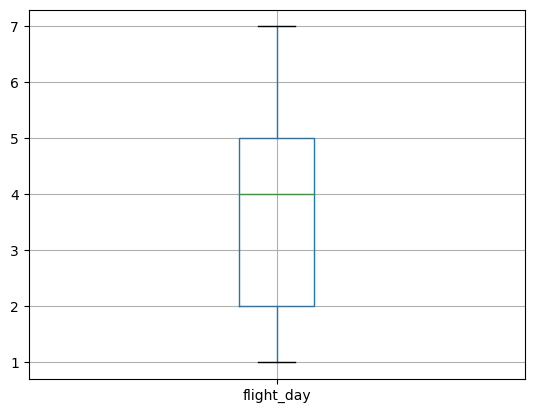

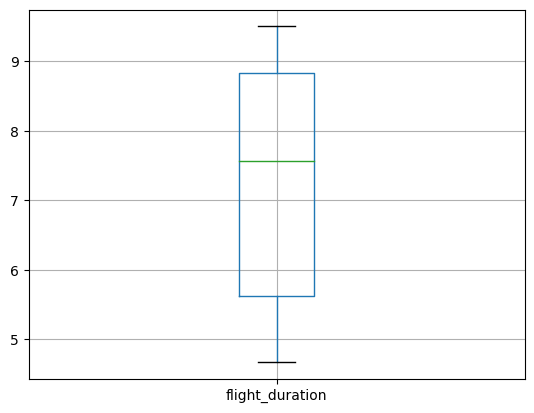

In [51]:
for i in ['num_passengers', 'purchase_lead', 'length_of_stay', 'flight_hour', 'flight_day', 'flight_duration']:
    df.boxplot([i])
    plt.show()

In [58]:
X = df.drop(columns=['booking_complete'])
y = df['booking_complete']

In [47]:
df.head(3)

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
0,2,Internet,RoundTrip,262,19,7,6,Other countries,1,0,0,5.52,0
1,1,Internet,RoundTrip,112,20,3,6,Other countries,0,0,0,5.52,0
2,2,Internet,RoundTrip,243,22,17,3,Other countries,1,1,0,5.52,0


In [53]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier


In [62]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline,make_pipeline
from sklearn import set_config
set_config(display='diagram')

In [63]:
transformer = ColumnTransformer(transformers=[
    ('ohe_tnf',OneHotEncoder(sparse=False),['sales_channel', 'trip_type', 'booking_origin'])
],remainder='passthrough')

In [64]:
rt = RandomForestClassifier(n_estimators=500, random_state=42)

In [65]:
pipe = Pipeline([
    ('transformer1',transformer),
    ('model',rt)
])

In [66]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [68]:
pipe.fit(X_train,y_train)

C:\Users\Rishabh\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\preprocessing\_encoders.py:808: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Pipeline(steps=[('transformer1',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ohe_tnf',
                                                  OneHotEncoder(sparse=False),
                                                  ['sales_channel', 'trip_type',
                                                   'booking_origin'])])),
                ('model',
                 RandomForestClassifier(n_estimators=500, random_state=42))])

In [71]:
y_pred = pipe.predict(X_test)

In [70]:
from sklearn.metrics import accuracy_score

In [72]:
print("Accuracy Score: ",accuracy_score(y_test,y_pred))

Accuracy Score:  0.8529


In [73]:
from sklearn.model_selection import cross_val_score

In [74]:
cv_score = cross_val_score(pipe, X_train, y_train, cv=5, scoring='accuracy')

C:\Users\Rishabh\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\preprocessing\_encoders.py:808: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
C:\Users\Rishabh\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\preprocessing\_encoders.py:808: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
C:\Users\Rishabh\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\preprocessing\_encoders.py:808: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
C:\Users\Rishabh\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\pr

In [75]:
cv_score.mean()

0.8500249999999999

In [76]:
cv_score

array([0.8495  , 0.84925 , 0.850125, 0.850125, 0.851125])

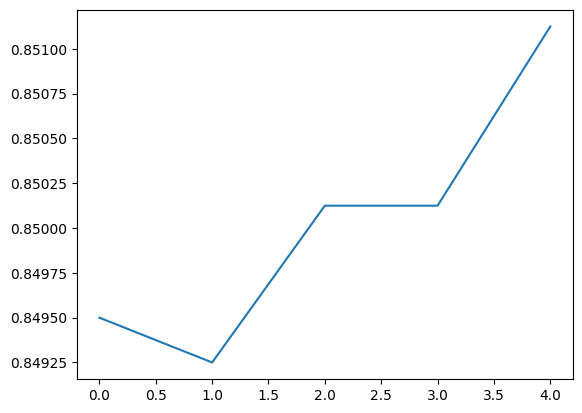

In [84]:
plt.plot(cv_score)